     x (m)      T RK4 (°C)   T Exacta (°C)      Error (°C)
    0.0000      100.000000      100.000000        0.000000
    0.1000       98.148243       98.148243        0.000000
    0.2000       96.342207       96.342207        0.000000
    0.3000       94.580761       94.580761        0.000000
    0.4000       92.862806       92.862806        0.000000
    0.5000       91.187268       91.187268        0.000000
    0.6000       89.553098       89.553098        0.000000
    0.7000       87.959277       87.959277        0.000000
    0.8000       86.404807       86.404806        0.000000
    0.9000       84.888716       84.888716        0.000000
    1.0000       83.410059       83.410059        0.000000
    1.1000       81.967909       81.967909        0.000000
    1.2000       80.561367       80.561367        0.000000
    1.3000       79.189552       79.189552        0.000000
    1.4000       77.851607       77.851607        0.000000
    1.5000       76.546696       76.546696        0.0000

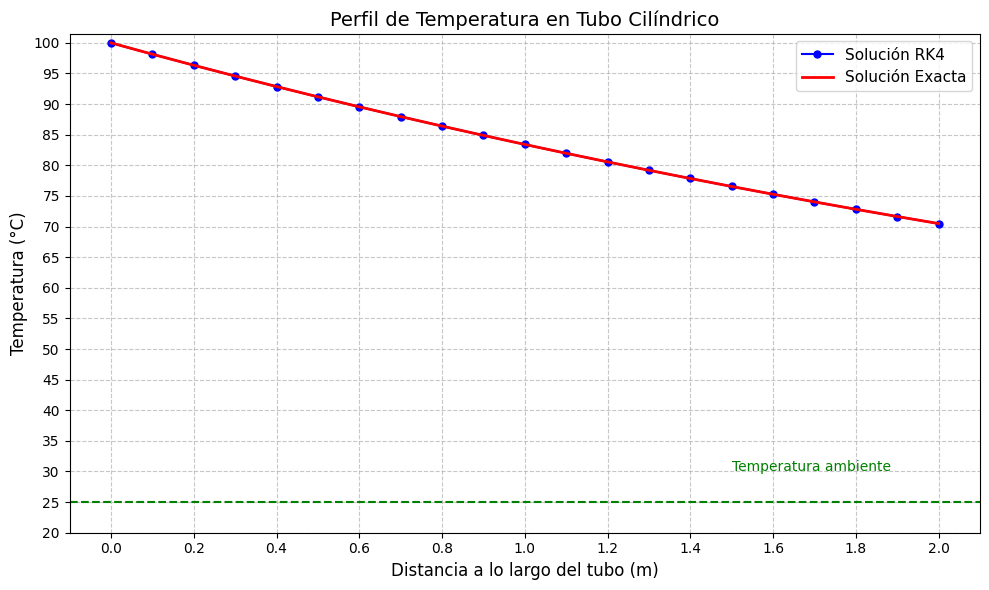

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la EDO: dT/dx = f(x, T)
def f(x, T):
    return -0.25 * (T - 25)  # Ecuación de transferencia de calor

# Solución exacta para comparación
def exact_solution(x):
    return 25 + 75 * np.exp(-0.25 * x)

# Método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, x0, y0, x_end, h):
    x_vals = [x0]
    y_vals = [y0]
    exact_vals = [exact_solution(x0)]

    x = x0
    y = y0

    print(f"{'x (m)':>10} {'T RK4 (°C)':>15} {'T Exacta (°C)':>15} {'Error (°C)':>15}")
    print(f"{x:10.4f} {y:15.6f} {exact_solution(x):15.6f} {0:15.6f}")

    while x < x_end:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        k3 = f(x + h/2, y + h/2 * k2)
        k4 = f(x + h, y + h * k3)

        y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h

        x_vals.append(x)
        y_vals.append(y)
        exact_vals.append(exact_solution(x))

        error = abs(y - exact_solution(x))
        print(f"{x:10.4f} {y:15.6f} {exact_solution(x):15.6f} {error:15.6f}")

    return x_vals, y_vals, exact_vals

# Parámetros iniciales
x0 = 0
T0 = 100  # Temperatura inicial en °C
x_end = 2  # Distancia final en metros
h = 0.1    # Paso de integración

# Llamada al método de Runge-Kutta
x_vals, T_rk4, T_exact = runge_kutta_4(f, x0, T0, x_end, h)

# Graficar las soluciones
plt.figure(figsize=(10, 6))
plt.plot(x_vals, T_rk4, 'bo-', markersize=5, label="Solución RK4")
plt.plot(x_vals, T_exact, 'r-', linewidth=2, label="Solución Exacta")
plt.xlabel("Distancia a lo largo del tubo (m)", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.title("Perfil de Temperatura en Tubo Cilíndrico", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(20, 105, 5))

# Añadir línea de temperatura ambiente
plt.axhline(y=25, color='g', linestyle='--', label='Temperatura ambiente (25°C)')
plt.text(1.5, 30, 'Temperatura ambiente', color='g')

plt.tight_layout()
plt.savefig("transferencia_calor_tubo.png", dpi=300)
plt.show()

     t (s)           q (C)         V_c (V)
    0.0000        0.000000        0.000000
    0.0500        0.000488        0.487706
    0.1000        0.000952        0.951626
    0.1500        0.001393        1.392920
    0.2000        0.001813        1.812692
    0.2500        0.002212        2.211992
    0.3000        0.002592        2.591818
    0.3500        0.002953        2.953119
    0.4000        0.003297        3.296799
    0.4500        0.003624        3.623718
    0.5000        0.003935        3.934693
    0.5500        0.004231        4.230502
    0.6000        0.004512        4.511883
    0.6500        0.004780        4.779542
    0.7000        0.005034        5.034147
    0.7500        0.005276        5.276334
    0.8000        0.005507        5.506710
    0.8500        0.005726        5.725850
    0.9000        0.005934        5.934303
    0.9500        0.006133        6.132590
    1.0000        0.006321        6.321205


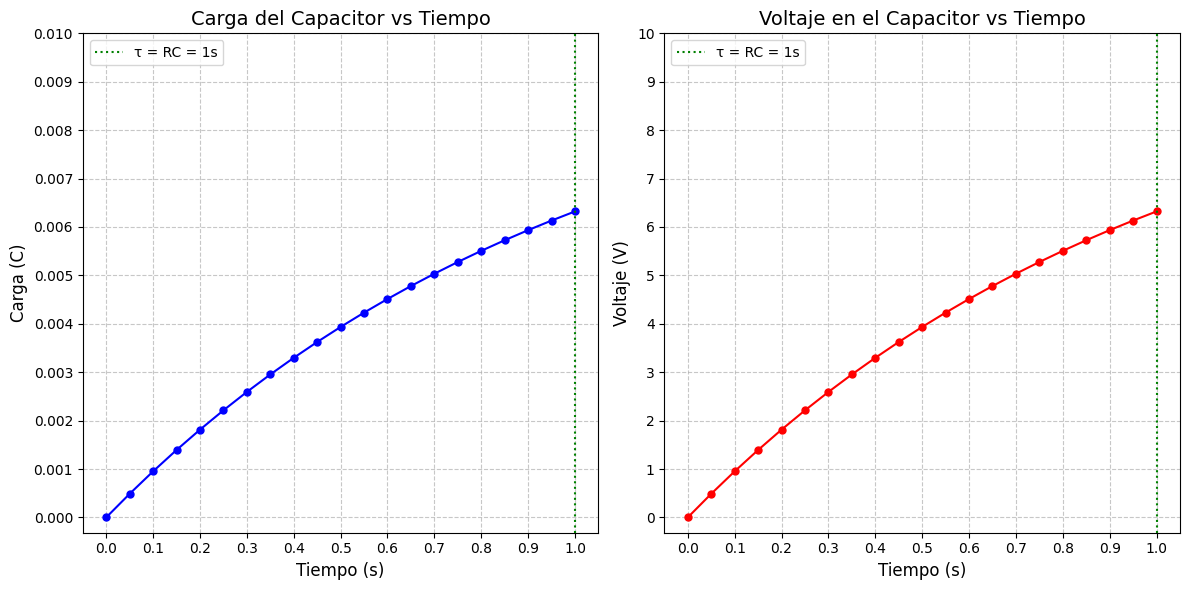

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
V = 10       # Voltaje (V)
R = 1000     # Resistencia (Ω)
C = 0.001    # Capacitancia (F)
tau = R * C  # Constante de tiempo (s)

# Definición de la EDO: dq/dt = f(t, q)
def f(t, q):
    return (V - q/C)/R

# Método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, t0, q0, t_end, h):
    t_vals = [t0]
    q_vals = [q0]

    t = t0
    q = q0

    print(f"{'t (s)':>10} {'q (C)':>15} {'V_c (V)':>15}")
    print(f"{t:10.4f} {q:15.6f} {q/C:15.6f}")

    while t < t_end:
        k1 = f(t, q)
        k2 = f(t + h/2, q + h/2 * k1)
        k3 = f(t + h/2, q + h/2 * k2)
        k4 = f(t + h, q + h * k3)

        q += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h

        t_vals.append(t)
        q_vals.append(q)

        print(f"{t:10.4f} {q:15.6f} {q/C:15.6f}")

    return t_vals, q_vals

# Condiciones iniciales
t0 = 0
q0 = 0
t_end = 1  # 1 segundo
h = 0.05   # Paso de tiempo

# Resolver con RK4
t_vals, q_vals = runge_kutta_4(f, t0, q0, t_end, h)

# Calcular voltaje en el capacitor
Vc_vals = [q/C for q in q_vals]

# Gráfico de la carga
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_vals, q_vals, 'bo-', markersize=5)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Carga (C)', fontsize=12)
plt.title('Carga del Capacitor vs Tiempo', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 0.011, 0.001))

# Gráfico del voltaje
plt.subplot(1, 2, 2)
plt.plot(t_vals, Vc_vals, 'ro-', markersize=5)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Voltaje (V)', fontsize=12)
plt.title('Voltaje en el Capacitor vs Tiempo', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 11, 1))

# Línea de constante de tiempo
for ax in plt.gcf().axes:
    ax.axvline(x=tau, color='g', linestyle=':', label='τ = RC = 1s')
    ax.legend()

plt.tight_layout()
plt.savefig("carga_capacitor_rc.png", dpi=300)
plt.show()

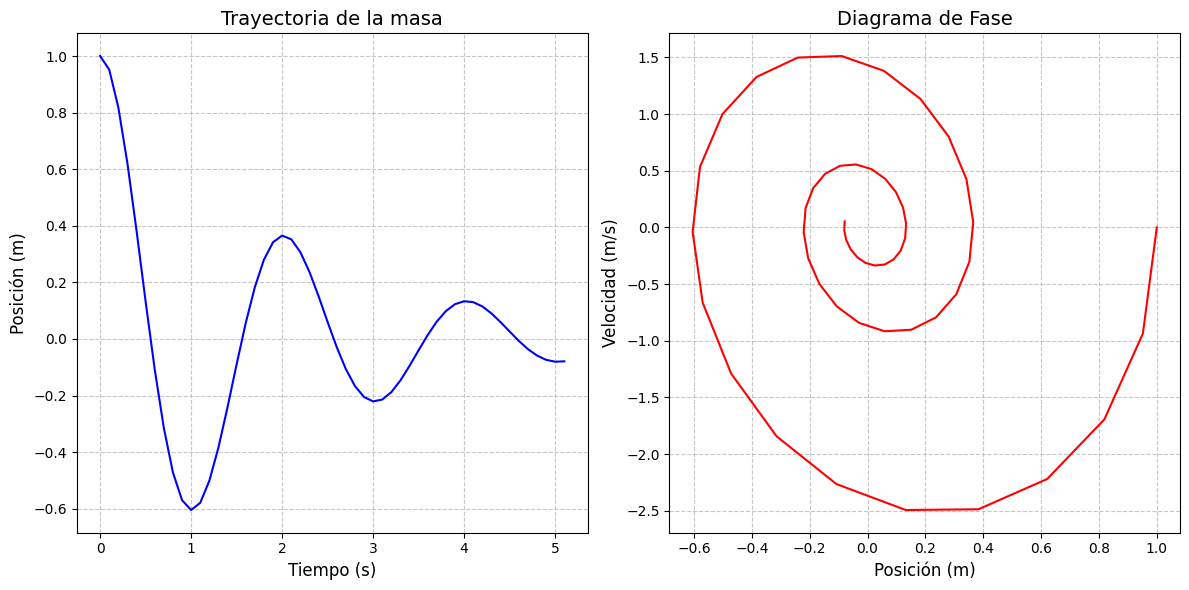


Análisis del sistema:
Frecuencia natural: ω₀ = 3.16 rad/s
Factor de amortiguamiento: ζ = 0.158
Sistema subamortiguado (oscilaciones que decaen exponencialmente)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema (valores típicos para un sistema subamortiguado)
m = 1.0    # Masa (kg)
k = 10.0   # Constante del resorte (N/m)
c = 1.0    # Coeficiente de amortiguamiento (Ns/m)

# Convertimos la EDO de segundo orden a sistema de primer orden:
# dy1/dt = y2
# dy2/dt = (-c*y2 - k*y1)/m
def f(t, Y):
    y1, y2 = Y
    return np.array([y2, (-c*y2 - k*y1)/m])

# Método de Runge-Kutta de cuarto orden para sistemas
def runge_kutta_4_system(f, t0, Y0, t_end, h):
    t_vals = [t0]
    Y_vals = [Y0.copy()]

    t = t0
    Y = Y0.copy()

    while t < t_end:
        k1 = f(t, Y)
        k2 = f(t + h/2, Y + h/2 * k1)
        k3 = f(t + h/2, Y + h/2 * k2)
        k4 = f(t + h, Y + h * k3)

        Y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h

        t_vals.append(t)
        Y_vals.append(Y.copy())

    return np.array(t_vals), np.array(Y_vals)

# Condiciones iniciales
t0 = 0
Y0 = np.array([1.0, 0.0])  # y1(0)=1, y2(0)=0
t_end = 5
h = 0.1

# Resolver el sistema
t, Y = runge_kutta_4_system(f, t0, Y0, t_end, h)
y1 = Y[:, 0]  # Posición
y2 = Y[:, 1]  # Velocidad

# Gráfico de la trayectoria
plt.figure(figsize=(12, 6))

# Posición vs tiempo
plt.subplot(1, 2, 1)
plt.plot(t, y1, 'b-', label='Posición (m)')
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Posición (m)', fontsize=12)
plt.title('Trayectoria de la masa', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Diagrama de fase (posición vs velocidad)
plt.subplot(1, 2, 2)
plt.plot(y1, y2, 'r-', label='Trayectoria de fase')
plt.xlabel('Posición (m)', fontsize=12)
plt.ylabel('Velocidad (m/s)', fontsize=12)
plt.title('Diagrama de Fase', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("resorte_amortiguado.png", dpi=300)
plt.show()

# Análisis del comportamiento
print("\nAnálisis del sistema:")
print(f"Frecuencia natural: ω₀ = {np.sqrt(k/m):.2f} rad/s")
print(f"Factor de amortiguamiento: ζ = {c/(2*np.sqrt(m*k)):.3f}")

if c < 2*np.sqrt(m*k):
    print("Sistema subamortiguado (oscilaciones que decaen exponencialmente)")
elif c == 2*np.sqrt(m*k):
    print("Sistema críticamente amortiguado")
else:
    print("Sistema sobreamortiguado")